<a href="https://colab.research.google.com/github/Anastasiia-osp/RUDN/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2

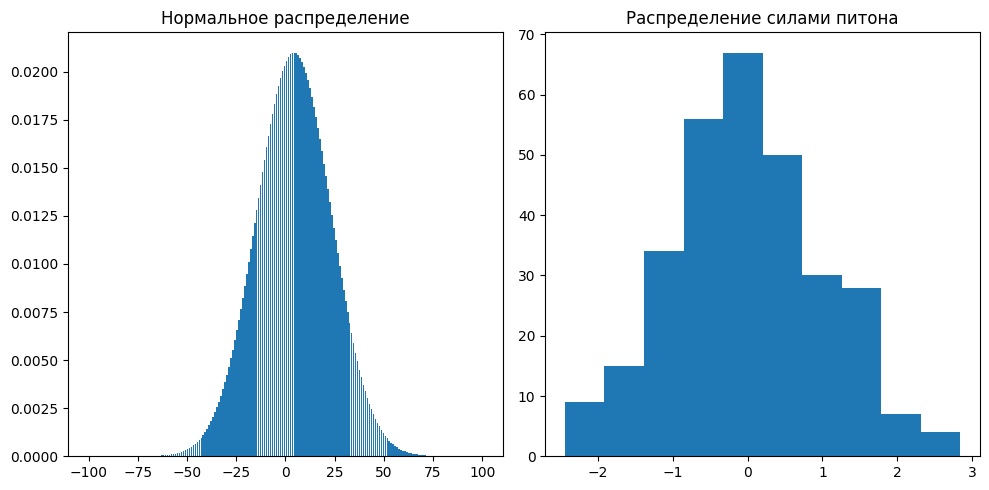

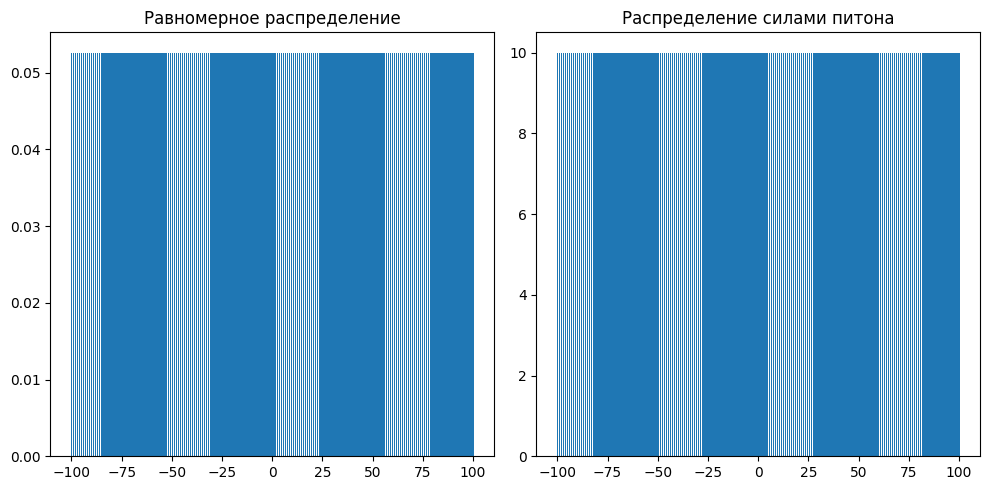

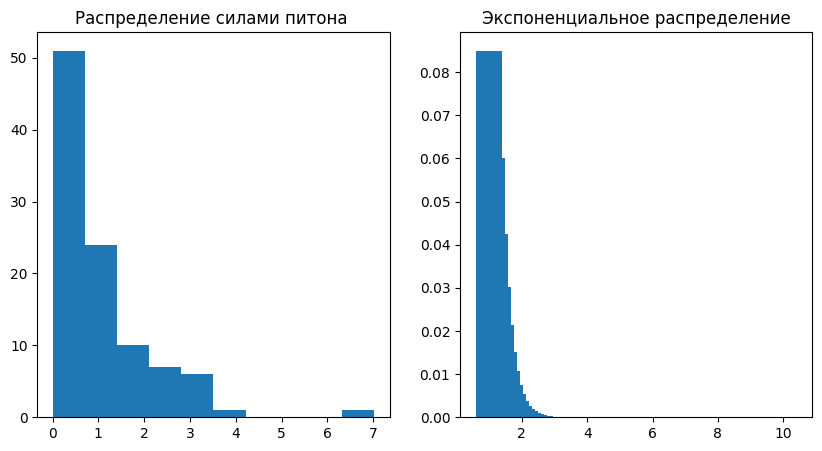

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
variant = 19

a = np.linspace(-100,100,200)

m = variant
sigma = variant**0.5

A = variant
B = A*2


### Блок функций для задания 1 ###
def norm_dist(x,m,sigma):
    return np.exp(-(x-m)**2/(2*sigma**2))/(sigma*np.sqrt(2*np.pi))

def ravn(x,a,b):
    if x < a and x > b:
        return 0
    else:
        return 1/(b-a)


def expon(lambda_, x):
    if x <= 0:
        return 0
    else:
        return lambda_*np.exp(-lambda_*x)


## П.1
# Нормальное распределение

values = []

for i in range(len(a)):
    X = norm_dist(a[i], sigma, m)
    values.append(X)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(x = a, height = values) #, bins = 8)
plt.title('Нормальное распределение')

plt.subplot(1, 2, 2)
plt.hist([np.random.normal() for _ in range(300)])
plt.title('Распределение силами питона')

plt.tight_layout()
plt.show()

# Равномерное

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(x = a, height = [ravn(x+variant,a = A, b = B) for x in a])
plt.title('Равномерное распределение')

plt.subplot(1, 2, 2)
plt.bar(x = a, height = [10 for _ in range(len(a))])
plt.title('Распределение силами питона')

plt.tight_layout()
plt.show()

# Экспоненциальное

values = []
a = np.linspace(1,10,100)

for i in range(len(a)):
    X = expon(lambda_ = 19/5, x = a[i])
    values.append(X)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist([np.random.exponential() for _ in range(100)])# , bins = 8)
plt.title('Распределение силами питона ')

plt.subplot(1, 2, 2)
plt.bar(x = a, height = values)
plt.title('Экспоненциальное распределение')
plt.show()

plt.tight_layout()
plt.show()


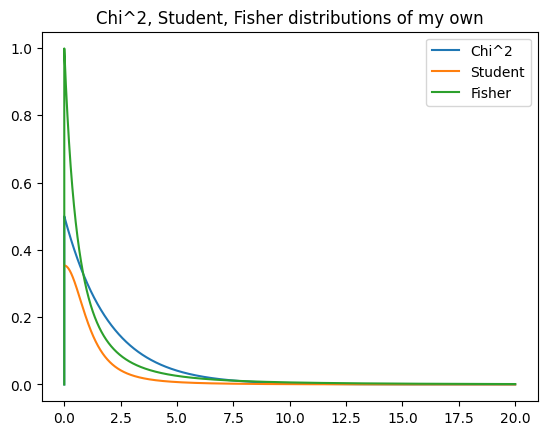

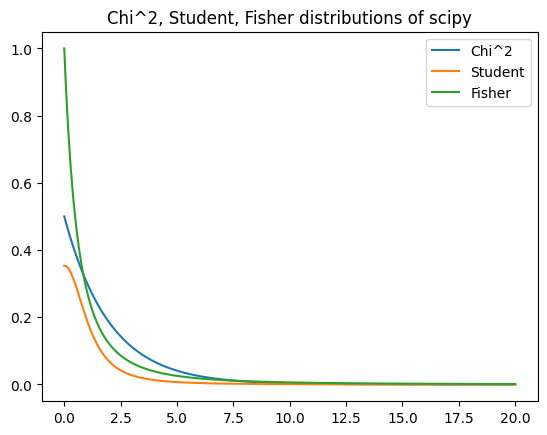

In [ ]:
## П.2
from scipy.stats import chi2, t, f
from scipy.special import gamma

#x-axis ranges from 0 to 20 with .001 steps
X = np.arange(0, 20, 0.001)
k1 = 2
k2 = 3

### Блок функций для задания 2###
def xi_2(x,k):
    if x <= 0:
        return 0
    else:
        return (np.exp(-x/2) * x**((k/2)-1))/((2**(k/2)) * gamma(k/2))

def student(x, k):
    return (gamma((k+1)/2) * (1 + x**2/k)**(-(k+1)/2))/(gamma(k/2)*(np.pi*k)**0.5)

def fisher(x, k1, k2):
    if x <= 0:
        return 0
    else:
        return ((gamma((k1+k2)/2)*(k1/k2)**(k1/2))/(gamma(k1/2)*gamma(k2/2)))*((x**((k1/2) - 1))/((1+k1*x/k2)**((k1+k2)/2)))

values = [xi_2(x,k1) for x in X]
values2 = [student(x,k1) for x in X]
values3 = [fisher(x,k1,k2) for x in X]
plt.plot(X, values, label = 'Chi^2')
plt.plot(X, values2, label = 'Student')
plt.plot(X, values3, label = 'Fisher')
plt.title('Chi^2, Student, Fisher distributions of my own')
plt.legend()
plt.show()


#plot Chi-square distribution with 4 degrees of freedom
k = 4
plt.plot(X, chi2.pdf(X, df=k1), label = 'Chi^2')

# plot student t distribution with 4 degrees of freedom
k = 4
plt.plot(X, t.pdf(X, df=k1), label = 'Student')

# plot fisher distribution
plt.plot(X, f.pdf(X,k1,k2), label = 'Fisher')
plt.legend()
plt.title('Chi^2, Student, Fisher distributions of scipy')
plt.show()

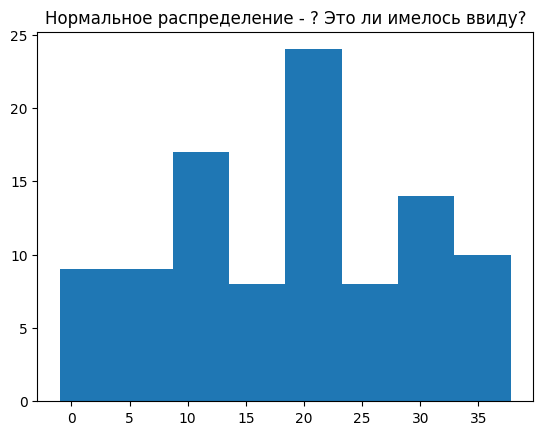

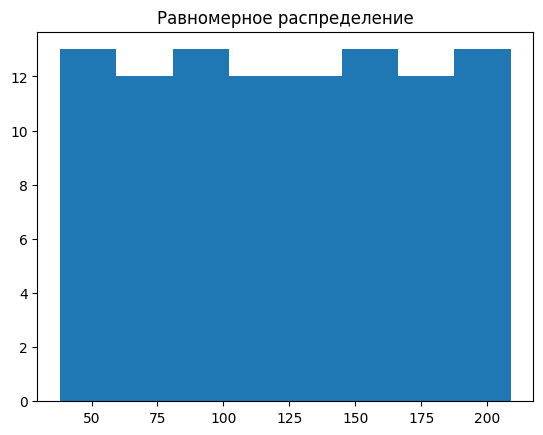

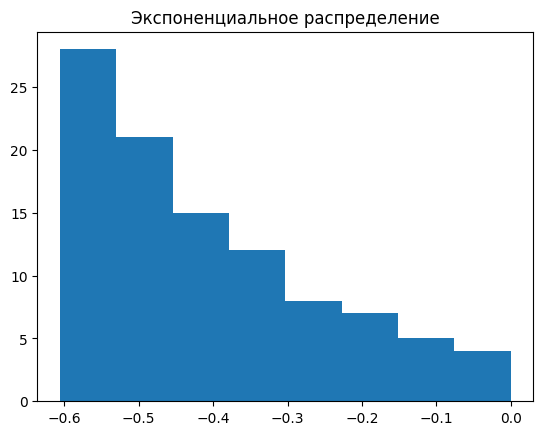

In [ ]:
## П.3
### Блок функций для задания 3 ###
def normal_dist(a1, a2, sigma, m): # Так описано в лабораторной пп.3; но на выходе распределение совсем не нормальное (для значений (0;1))
    c = 2*np.pi
    r = -2*np.log(a1)
    phi = c*a2
    X1 = r*np.cos(phi)
    X2 = r*np.sin(phi)
    X1 = sigma * X1 + m
    X2 = sigma * X2 + m

    return X1,X2

def ravnomernoe(alpha,a,b): # п.3 лабораторной
    return a + (b-a)*alpha

def exponential(alpha): # п.3 лабораторной
    lambda_ = variant/5
    return (-lambda_**(-1)) * np.log(alpha)


# Нормальное распределение

a = np.linspace(1,10,100)
values = []

for i in range(len(a)):
    if i <= len(a)-2:
        X1, X2 = normal_dist(a[i], a[i+1], sigma, m)
        values.append(X1)

plt.hist(values, bins = 8)
plt.title('Нормальное распределение - ? Это ли имелось ввиду?')
plt.show()

# Равномерное распределение
values = []

for i in range(len(a)):
    X = ravnomernoe(a[i],A,B)
    values.append(X)

plt.hist(values, bins = 8)
plt.title('Равномерное распределение')
plt.show()

# Экспоненциальное распределение
values = []

for i in range(len(a)):
    X = exponential(a[i])
    values.append(X)

plt.hist(values, bins = 8)
plt.title('Экспоненциальное распределение')
plt.show()